In [1]:
# change the cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)

# Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import matplotlib as mpl
mpl.style.use('ggplot')

In [4]:
train = pd.read_csv('train-new.csv')
train.head()

,dvcat,weight,dead,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,caseid,injSeverity
0,55+,53.342,dead,airbag,belted,1,f,48,2002,1997,deploy,driver,1,45:150:1,3
1,25-39,154.960,alive,none,none,1,m,26,2001,1968,unavail,driver,0,76:40:1,3
2,55+,38.994,alive,none,none,1,f,51,2002,1994,unavail,driver,0,11:184:1,3
3,25-39,168.568,alive,airbag,belted,1,m,27,1998,1996,deploy,pass,1,9:17:1,3
4,10-24,27.751,alive,airbag,belted,0,m,26,2002,1997,nodeploy,pass,0,2:2:2,0


In [5]:
test = pd.read_csv('test-new.csv')
test.head()

,dvcat,weight,dead,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,caseid
0,40-54,18.895,alive,airbag,belted,0,m,25,2002,2000.0,deploy,pass,1,81:99:1
1,25-39,266.532,alive,none,none,1,f,28,2001,1991.0,unavail,driver,0,76:12:2
2,25-39,51.810,alive,airbag,belted,1,f,36,1999,1994.0,deploy,driver,1,78:53:2
3,10-24,1567.626,alive,airbag,belted,0,f,24,2002,1994.0,nodeploy,driver,0,11:47:1
4,25-39,31.342,alive,none,none,1,f,46,1997,1990.0,unavail,pass,0,12:87:2


In [6]:
# Create a new column for df value labels and assign it to a new DataFrame df1
train1 = train.copy()
train1['Train_Test_Label'] = "Train"

In [7]:
# Create test1 dataframe, a copy of Test and create a new_column for test label
test1 = test.copy()
test1['Train_Test_Label'] = "Test"

In [8]:
# Create DataFrame "df" with df and test labels
df = pd.concat([train1,test1], axis=0, ignore_index=True)

In [9]:
df.head()

,dvcat,weight,dead,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,caseid,injSeverity,Train_Test_Label
0,55+,53.342,dead,airbag,belted,1,f,48,2002,1997.0,deploy,driver,1,45:150:1,3.0,Train
1,25-39,154.960,alive,none,none,1,m,26,2001,1968.0,unavail,driver,0,76:40:1,3.0,Train
2,55+,38.994,alive,none,none,1,f,51,2002,1994.0,unavail,driver,0,11:184:1,3.0,Train
3,25-39,168.568,alive,airbag,belted,1,m,27,1998,1996.0,deploy,pass,1,9:17:1,3.0,Train
4,10-24,27.751,alive,airbag,belted,0,m,26,2002,1997.0,nodeploy,pass,0,2:2:2,0.0,Train


# Statistical Analysis

In [10]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
dvcat,26217,5,10-24,12848,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weight,26217,NaN,NaN,NaN,462.812,1524.84,0,32.467,86.986,364.717,57871.6
dead,26217,2,alive,25037,NaN,NaN,NaN,NaN,NaN,NaN,NaN
airbag,26217,2,airbag,14419,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seatbelt,26217,2,belted,18573,NaN,NaN,NaN,NaN,NaN,NaN,NaN
frontal,26217,NaN,NaN,NaN,0.643323,0.479027,0,0,1,1,1
sex,26217,2,m,13969,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ageOFocc,26217,NaN,NaN,NaN,37.2062,17.9093,16,22,33,48,97
yearacc,26217,NaN,NaN,NaN,1999.56,1.70255,1997,1998,2000,2001,2002
yearVeh,26216,NaN,NaN,NaN,1992.8,5.59499,1953,1989,1994,1997,2003


## dvcat

In [11]:
df['dvcat'].describe()

count     26217
unique        5
top       10-24
freq      12848
Name: dvcat, dtype: object

In [12]:
df['dvcat'].unique()

array(['55+', '25-39', '10-24', '40-54', '1-9km/h'], dtype=object)

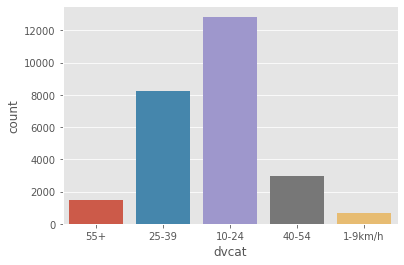

In [13]:
sns.countplot(df['dvcat'])
plt.show()

In [14]:
# Let us categorxze thxs column
def cat(x):
    if x=="1-9km/h":
        x=0
        return x
    elif x=="10-24":
        x=1
        return x
    elif x=="25-39":
        x=2
        return x
    elif x=="40-54":
        x=3
        return x
    elif x=="55+":
        x=4
        return x

In [15]:
df['dvcat'] = df['dvcat'].apply(lambda x:cat(x))
df['dvcat'].unique()

array([4, 2, 1, 3, 0], dtype=int64)

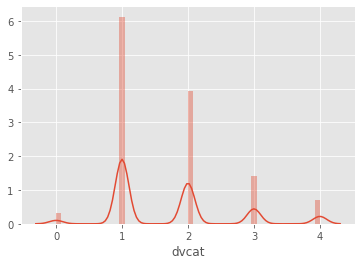

In [16]:
sns.distplot(df['dvcat'])
plt.show()

## weight

In [17]:
df['weight'].describe()

count    26217.000000
mean       462.811611
std       1524.844430
min          0.000000
25%         32.467000
50%         86.986000
75%        364.717000
max      57871.595000
Name: weight, dtype: float64

In [18]:
df['weight'].unique()

array([ 53.342, 154.96 ,  38.994, ..., 301.909, 324.453, 482.272])

In [19]:
df['weight'].isnull().sum()

0

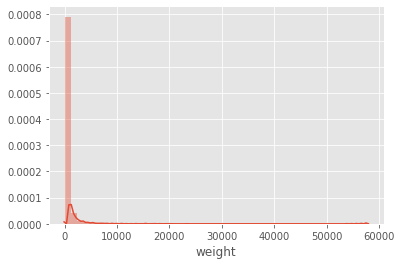

In [20]:
sns.distplot(df['weight'])
plt.show()

## dead

In [21]:
df['dead'].describe()

count     26217
unique        2
top       alive
freq      25037
Name: dead, dtype: object

In [22]:
df['dead'].unique()

array(['dead', 'alive'], dtype=object)

In [23]:
df['dead'].isnull().sum()

0

In [24]:
df['dead'][df['dead'].str.isnumeric()]

Series([], Name: dead, dtype: object)

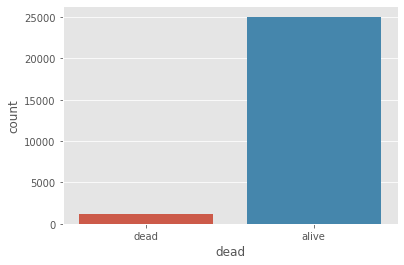

In [25]:
sns.countplot(df['dead'])
plt.show()

In [26]:
df['dead'].replace({'dead':0,'alive':1}, inplace=True)

In [27]:
df['dead'].value_counts()

1    25037
0     1180
Name: dead, dtype: int64

## airbag

In [28]:
df['airbag'].describe()

count      26217
unique         2
top       airbag
freq       14419
Name: airbag, dtype: object

In [29]:
df['airbag'].unique()

array(['airbag', 'none'], dtype=object)

In [30]:
df['airbag'][df['airbag']=='none'].count()

11798

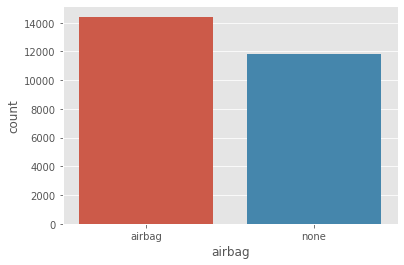

In [31]:
sns.countplot(df['airbag'])
plt.show()

In [32]:
df['airbag'].replace({'none':0,'airbag':1}, inplace=True)

In [33]:
df['airbag'].value_counts()

1    14419
0    11798
Name: airbag, dtype: int64

## seatbelt

In [34]:
df['seatbelt'].describe()

count      26217
unique         2
top       belted
freq       18573
Name: seatbelt, dtype: object

In [35]:
df['seatbelt'].unique()

array(['belted', 'none'], dtype=object)

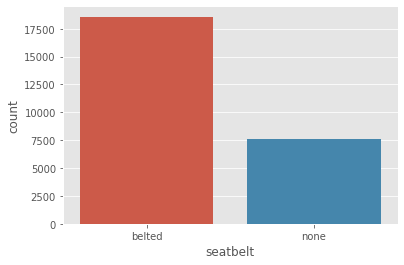

In [36]:
sns.countplot(df['seatbelt'])
plt.show()

In [37]:
df['seatbelt'].replace({'none':0,'belted':1}, inplace=True)

In [38]:
df['seatbelt'].value_counts()

1    18573
0     7644
Name: seatbelt, dtype: int64

## frontal

In [39]:
df['frontal'].describe()

count    26217.000000
mean         0.643323
std          0.479027
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: frontal, dtype: float64

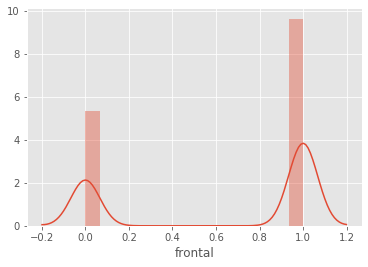

In [40]:
sns.distplot(df['frontal'])
plt.show()

In [41]:
df['frontal'].unique()

array([1, 0], dtype=int64)

## sex

In [42]:
df['sex'].describe()

count     26217
unique        2
top           m
freq      13969
Name: sex, dtype: object

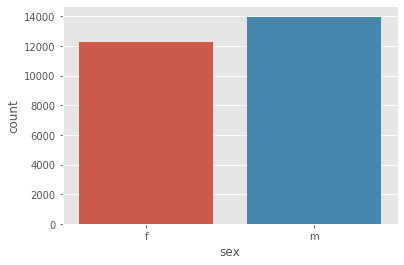

In [43]:
sns.countplot(df['sex'])
plt.show()

In [44]:
df['sex'].replace(to_replace=['f','m'], value=[0,1], inplace=True)

In [45]:
df['sex'].value_counts()

1    13969
0    12248
Name: sex, dtype: int64

## ageOFocc

In [46]:
df['ageOFocc'].describe()

count    26217.000000
mean        37.206202
std         17.909317
min         16.000000
25%         22.000000
50%         33.000000
75%         48.000000
max         97.000000
Name: ageOFocc, dtype: float64

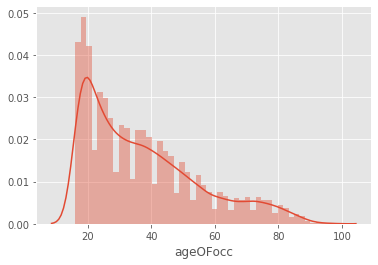

In [47]:
sns.distplot(df['ageOFocc'])
plt.show()

In [48]:
df['ageOFocc'].isnull().sum()

0

## yearacc

In [49]:
df['yearacc'].describe()

count    26217.000000
mean      1999.555556
std          1.702546
min       1997.000000
25%       1998.000000
50%       2000.000000
75%       2001.000000
max       2002.000000
Name: yearacc, dtype: float64

In [50]:
df['yearacc'].unique()

array([2002, 2001, 1998, 1999, 1997, 2000], dtype=int64)

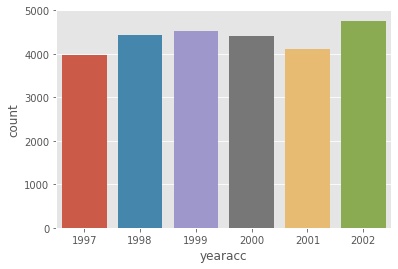

In [51]:
sns.countplot(df['yearacc'])
plt.show()

In [52]:
# Let us categorize the years 
def cat_years(x):
    if x==1997:
        x=0
        return x
    elif x==1998:
        x=1
        return x
    elif x==1999:
        x=2
        return x
    elif x==2000:
        x=3
        return x
    elif x==2001:
        x=4
        return x
    elif x==2002:
        x=5
        return x

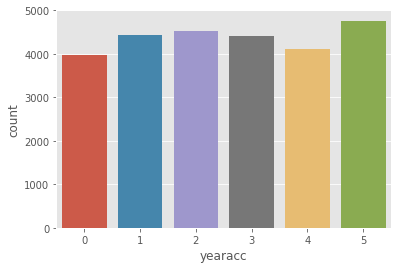

In [53]:
df['yearacc'] = df['yearacc'].apply(lambda x:cat_years(x))
sns.countplot(df['yearacc'])
plt.show()

In [54]:
df['yearacc'].isnull().sum()

0

## yearVeh

In [55]:
df['yearVeh'].describe()

count    26216.000000
mean      1992.804699
std          5.594990
min       1953.000000
25%       1989.000000
50%       1994.000000
75%       1997.000000
max       2003.000000
Name: yearVeh, dtype: float64

In [56]:
df['yearVeh'].unique()

array([1997., 1968., 1994., 1996., 1991., 1987., 2000., 1998., 1988.,
       1985., 1992., 1995., 1999., 1989., 1972., 1993., 1990., 1979.,
       2002., 2001., 1984., 1983., 1986., 1982., 1966., 1977., 1969.,
       1973., 1981., 1980., 1978., 1967., 1963., 1965., 1970., 1975.,
       1976., 1974., 2003., 1971., 1959., 1953., 1961., 1964.,   nan,
       1956.])

In [57]:
df['yearVeh'].unique()

array([1997., 1968., 1994., 1996., 1991., 1987., 2000., 1998., 1988.,
       1985., 1992., 1995., 1999., 1989., 1972., 1993., 1990., 1979.,
       2002., 2001., 1984., 1983., 1986., 1982., 1966., 1977., 1969.,
       1973., 1981., 1980., 1978., 1967., 1963., 1965., 1970., 1975.,
       1976., 1974., 2003., 1971., 1959., 1953., 1961., 1964.,   nan,
       1956.])

In [58]:
df['yearVeh'].isnull().sum()

1

In [59]:
df[df['yearVeh'].isnull()]

,dvcat,weight,dead,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,caseid,injSeverity,Train_Test_Label
19236,1,8521.81,1,1,1,1,1,27,0,NaN,deploy,driver,1,11:138:1,NaN,Test


In [60]:
df['yearVeh'].median()

1994.0

In [61]:
df['yearVeh'].mode()

0    1995.0
dtype: float64

In [62]:
df['yearVeh'][df['yearVeh'].isnull()] = 1995.0

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [63]:
df['yearVeh'].isnull().sum()

0

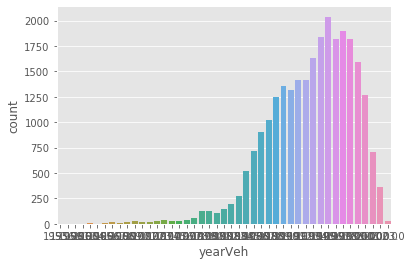

In [64]:
sns.countplot(df['yearVeh'])
plt.show()

In [65]:
df['yearVeh'].sort_values().nunique()

45

In [66]:
l1 = list(df['yearVeh'].sort_values().unique())
l1

[1953.0,
 1956.0,
 1959.0,
 1961.0,
 1963.0,
 1964.0,
 1965.0,
 1966.0,
 1967.0,
 1968.0,
 1969.0,
 1970.0,
 1971.0,
 1972.0,
 1973.0,
 1974.0,
 1975.0,
 1976.0,
 1977.0,
 1978.0,
 1979.0,
 1980.0,
 1981.0,
 1982.0,
 1983.0,
 1984.0,
 1985.0,
 1986.0,
 1987.0,
 1988.0,
 1989.0,
 1990.0,
 1991.0,
 1992.0,
 1993.0,
 1994.0,
 1995.0,
 1996.0,
 1997.0,
 1998.0,
 1999.0,
 2000.0,
 2001.0,
 2002.0,
 2003.0]

In [67]:
l2 = []

for i in range(len(l1)):
    l2.append(i)

In [68]:
df['yearVeh'].replace(to_replace=l1, value=l2, inplace=True)

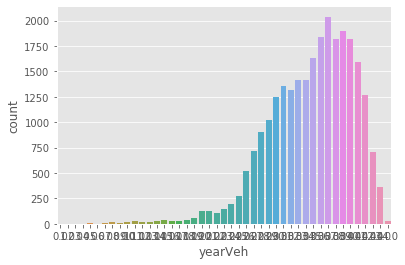

In [69]:
sns.countplot(df['yearVeh'])
plt.show()

## abcat

In [70]:
df['abcat'].describe()

count       26217
unique          3
top       unavail
freq        11798
Name: abcat, dtype: object

In [71]:
df['abcat'].unique()

array(['deploy', 'unavail', 'nodeploy'], dtype=object)

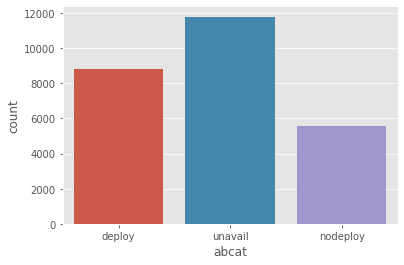

In [72]:
sns.countplot(df['abcat'])
plt.show()

In [73]:
df['abcat'].unique()

array(['deploy', 'unavail', 'nodeploy'], dtype=object)

In [74]:
df['abcat'].replace(to_replace=['deploy', 'unavail', 'nodeploy'], value=[2,1,0], inplace=True)

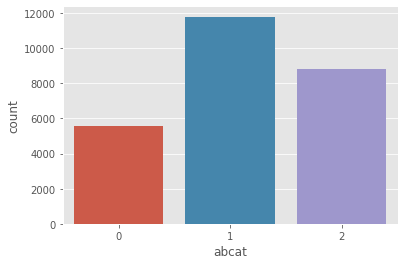

In [75]:
sns.countplot(df['abcat'])
plt.show()

## occRole

In [76]:
df['occRole'].describe()

count      26217
unique         2
top       driver
freq       20601
Name: occRole, dtype: object

In [77]:
df['occRole'].unique()

array(['driver', 'pass'], dtype=object)

In [78]:
df['occRole'].isnull().sum()

0

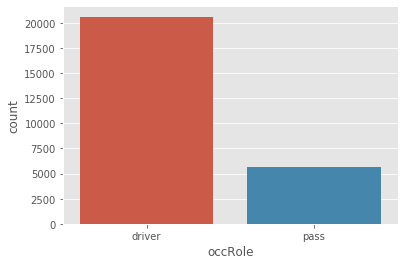

In [79]:
sns.countplot(df['occRole'])
plt.show()

In [80]:
df['occRole'].replace({'driver':1,'pass':0}, inplace=True)

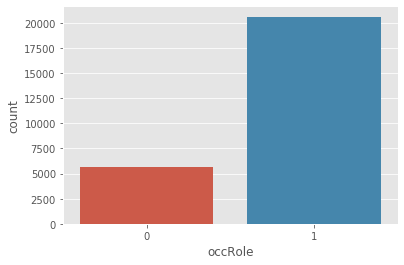

In [81]:
sns.countplot(df['occRole'])
plt.show()

## deploy

In [82]:
df['deploy'].describe()

count    26217.000000
mean         0.337033
std          0.472705
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: deploy, dtype: float64

In [83]:
df['deploy'].isnull().sum()

0

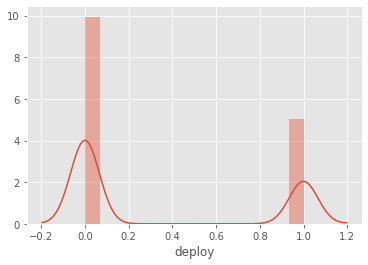

In [84]:
sns.distplot(df['deploy'])
plt.show()

## caseid

In [85]:
df['caseid'].describe()

count        26217
unique        9409
top       13:157:1
freq            11
Name: caseid, dtype: object

In [86]:
df['caseid'].groupby(df['caseid']).value_counts()

caseid    caseid  
11:100:2  11:100:2    2
11:101:1  11:101:1    1
11:102:1  11:102:1    4
11:102:2  11:102:2    1
11:103:1  11:103:1    6
                     ..
9:98:3    9:98:3      1
9:99:1    9:99:1      2
9:99:2    9:99:2      2
9:9:1     9:9:1       3
9:9:2     9:9:2       1
Name: caseid, Length: 9409, dtype: int64

In [87]:
df.head()

,dvcat,weight,dead,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,caseid,injSeverity,Train_Test_Label
0,4,53.342,0,1,1,1,0,48,5,38.0,2,1,1,45:150:1,3.0,Train
1,2,154.960,1,0,0,1,1,26,4,9.0,1,1,0,76:40:1,3.0,Train
2,4,38.994,1,0,0,1,0,51,5,35.0,1,1,0,11:184:1,3.0,Train
3,2,168.568,1,1,1,1,1,27,1,37.0,2,0,1,9:17:1,3.0,Train
4,1,27.751,1,1,1,0,1,26,5,38.0,0,0,0,2:2:2,0.0,Train


## injSeverity

In [88]:
df['injSeverity'].describe()

count    17565.000000
mean         1.713066
std          1.290565
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: injSeverity, dtype: float64

In [89]:
df['injSeverity'].isnull().sum()

8652

In [90]:
df['injSeverity'].unique()

array([ 3.,  0.,  2.,  1.,  4.,  5.,  6., nan])

In [91]:
df['injSeverity'][df['Train_Test_Label']=="Train"].isnull().sum()

0

In [92]:
df['injSeverity'][df['Train_Test_Label']=="Test"].isnull().sum()

8652

In [93]:
df['injSeverity'][df['Train_Test_Label']=="Train"].dtypes

dtype('float64')

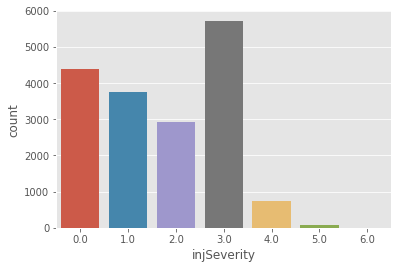

In [94]:
sns.countplot(df['injSeverity'][df['Train_Test_Label']=="Train"])
plt.show()

In [95]:
df['Train_Test_Label'].value_counts()

Train    17565
Test      8652
Name: Train_Test_Label, dtype: int64

In [96]:
df_final_train = df[df['Train_Test_Label']=="Train"]
df_final_train.drop(['Train_Test_Label','caseid'], inplace=True, axis=1)    
df_final_train.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,dvcat,weight,dead,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity
0,4,53.342,0,1,1,1,0,48,5,38.0,2,1,1,3.0
1,2,154.960,1,0,0,1,1,26,4,9.0,1,1,0,3.0
2,4,38.994,1,0,0,1,0,51,5,35.0,1,1,0,3.0
3,2,168.568,1,1,1,1,1,27,1,37.0,2,0,1,3.0
4,1,27.751,1,1,1,0,1,26,5,38.0,0,0,0,0.0


In [97]:
df_final_test = df[df['Train_Test_Label']=="Test"]
df_final_test.drop(['Train_Test_Label','injSeverity','caseid'], inplace=True, axis=1)    
df_final_test.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,dvcat,weight,dead,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy
17565,3,18.895,1,1,1,0,1,25,5,41.0,2,0,1
17566,2,266.532,1,0,0,1,0,28,4,32.0,1,1,0
17567,2,51.810,1,1,1,1,0,36,2,35.0,2,1,1
17568,1,1567.626,1,1,1,0,0,24,5,35.0,0,1,0
17569,2,31.342,1,0,0,1,0,46,0,31.0,1,0,0


In [98]:
# Export the imputed data to csv files 
df_final_train.to_csv('final_train.csv', index=False, header=True)
df_final_test.to_csv('final_test.csv', index=False, header=True)